<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 2</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm NN</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [1]:
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from operator import itemgetter

Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [2]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [3]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [4]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków


In [5]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(10) #n = 10
graph, points = all

In [6]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (-64, 46, 32)
B: (-59, 36, -45)
C: (-27, 3, 23)
D: (-63, 35, 51)
E: (-85, 14, -57)
F: (38, 36, -87)
G: (34, 11, -35)
H: (-25, 22, -6)
I: (-75, 20, 71)
J: (48, 4, 46)


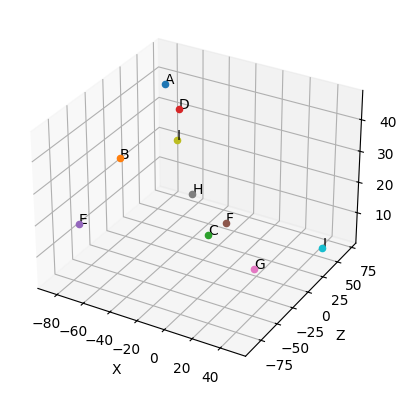

{'A': [-64, 46, 32],
 'B': [-59, 36, -45],
 'C': [-27, 3, 23],
 'D': [-63, 35, 51],
 'E': [-85, 14, -57],
 'F': [38, 36, -87],
 'G': [34, 11, -35],
 'H': [-25, 22, -6],
 'I': [-75, 20, 71],
 'J': [48, 4, 46]}

In [7]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)
points

In [8]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

In [9]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

57.436921923097515


Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [10]:
def distances(points):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
distances_dict

{('A', 'B'): 77.80745465570763,
 ('A', 'C'): 57.436921923097515,
 ('A', 'D'): 21.97726097583591,
 ('A', 'E'): 96.88137075826292,
 ('A', 'F'): 157.05094714773293,
 ('A', 'G'): 123.76590806841762,
 ('A', 'H'): 59.50630218724736,
 ('A', 'I'): 48.14561246884289,
 ('A', 'J'): 120.43255373859678,
 ('B', 'A'): 77.80745465570763,
 ('B', 'C'): 82.0792300158816,
 ('B', 'D'): 96.08850087289322,
 ('B', 'E'): 36.11094017053558,
 ('B', 'F'): 105.70241246064349,
 ('B', 'G'): 96.81941953967706,
 ('B', 'H'): 53.600373133029585,
 ('B', 'I'): 118.18629362155326,
 ('B', 'J'): 144.06248644251562,
 ('C', 'A'): 57.436921923097515,
 ('C', 'B'): 82.0792300158816,
 ('C', 'D'): 55.71355310873648,
 ('C', 'E'): 99.42333730065593,
 ('C', 'F'): 131.96211577570284,
 ('C', 'G'): 84.55175929571188,
 ('C', 'H'): 34.72751070837067,
 ('C', 'I'): 69.97856814768362,
 ('C', 'J'): 78.45380806563821,
 ('D', 'A'): 21.97726097583591,
 ('D', 'B'): 96.08850087289322,
 ('D', 'C'): 55.71355310873648,
 ('D', 'E'): 112.2007130102122,


Funkcja sumująca odległość na całej ścieżce.

In [11]:
def get_path_length(path, dist_dict):
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath, distances_dict))



['A', 'D', 'C', 'B']  --->  159.77004410045402


In [12]:
# def edges(dist_dict):
#     graph = {}
#     for edge in dist_dict:
#         node1, node2 = edge
#         if node1 not in graph:
#             graph[node1] = [node2]
#         else:
#             graph[node1].append(node2)
#     return graph

# graph = edges(distances_dict)
# graph

1. Algorytm zachłanny - znajdowanie ścieżki poszukując najbliższego (nieodwiedzonego) sąsiada.

In [13]:
def nearest_neighbour(graph, dist_dict, starter_node):
    node = starter_node
    path = []
    full_distance = 0
    while len(path) < len(graph):
        path.append(node)
        if(len(path) == len(graph)):
            break
        distance = float('inf')
        next_node = ''
        for neighbour in graph[node]:
            min_dist = dist_dict[(node, neighbour)]
            if neighbour not in path and min_dist < distance:
                distance = min_dist
                next_node = neighbour
        full_distance += distance
        print("nearest unvisited neighbour to", node, "-->", next_node, ". edge distance",
              "(",node,",", next_node,") = ", distance, ", full distance : ", full_distance)
        node = next_node
    dist_to_starter_node = dist_dict[(next_node, starter_node)]
    full_distance += dist_to_starter_node
    print("Going to the start point", "(",next_node,",", starter_node,") = ", dist_to_starter_node, ", full distance : ", full_distance)
    path.append(starter_node)
    return (path, full_distance)
            

NN = nearest_neighbour(graph,distances_dict, 'A')
NN


nearest unvisited neighbour to A --> D . edge distance ( A , D ) =  21.97726097583591 , full distance :  21.97726097583591
nearest unvisited neighbour to D --> I . edge distance ( D , I ) =  27.730849247724095 , full distance :  49.708110223560006
nearest unvisited neighbour to I --> C . edge distance ( I , C ) =  69.97856814768362 , full distance :  119.68667837124363
nearest unvisited neighbour to C --> H . edge distance ( C , H ) =  34.72751070837067 , full distance :  154.4141890796143
nearest unvisited neighbour to H --> B . edge distance ( H , B ) =  53.600373133029585 , full distance :  208.01456221264388
nearest unvisited neighbour to B --> E . edge distance ( B , E ) =  36.11094017053558 , full distance :  244.12550238317945
nearest unvisited neighbour to E --> G . edge distance ( E , G ) =  121.05370708904374 , full distance :  365.1792094722232
nearest unvisited neighbour to G --> F . edge distance ( G , F ) =  57.83597496368502 , full distance :  423.0151844359082
nearest u

(['A', 'D', 'I', 'C', 'H', 'B', 'E', 'G', 'F', 'J', 'A'], 680.6082281123876)

In [14]:
def plot3D_path(path, pointsp, angle):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=angle)
    ax.set_title(f"Angle: {angle}")

    for point, label in zip(pointsp.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([pointsp[point1][0], pointsp[point2][0]],
                [pointsp[point1][2], pointsp[point2][2]],
                [pointsp[point1][1], pointsp[point2][1]])
    plt.show()


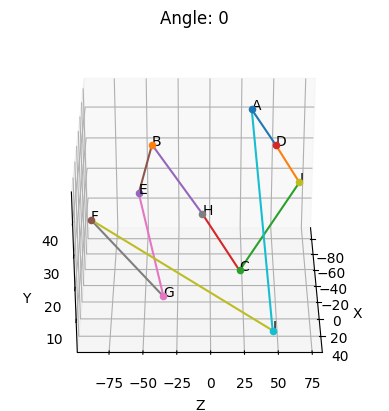

In [15]:
plot3D_path(NN[0], points, 0)

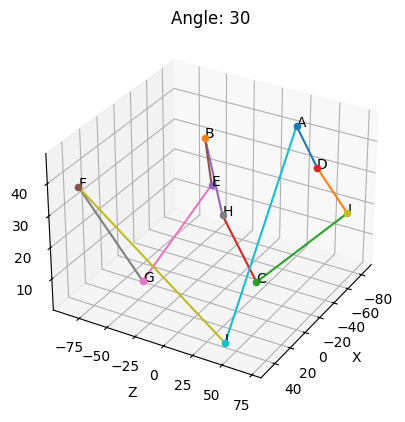

In [16]:
plot3D_path(NN[0], points, 30)

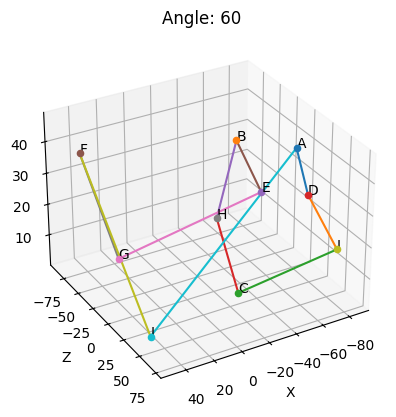

In [17]:
plot3D_path(NN[0], points, 60)

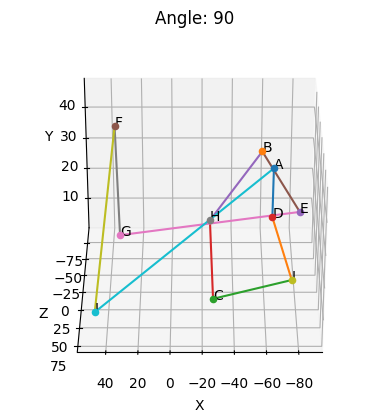

In [18]:
plot3D_path(NN[0], points, 90)

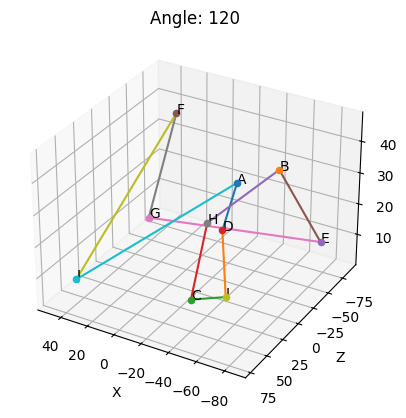

In [19]:
plot3D_path(NN[0], points, 120)

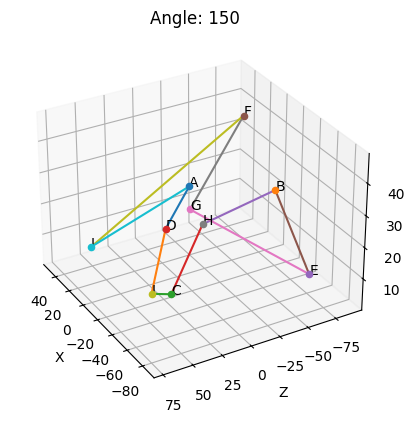

In [20]:
plot3D_path(NN[0], points, 150)

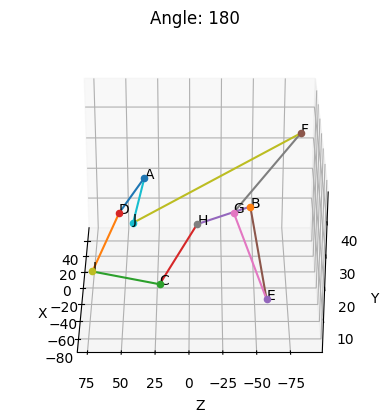

In [21]:
plot3D_path(NN[0], points, 180)

2. Algorytm najkrótszej krawędzi

In [22]:
def plot3D_path_from_edges(edges, pointsp, angle):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=angle)
    ax.set_title(f"Angle: {angle}")

    for point, label in zip(pointsp.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for edge in edges:
        point1 = edge[0]
        point2 = edge[1]
        ax.plot([pointsp[point1][0], pointsp[point2][0]],
                [pointsp[point1][2], pointsp[point2][2]],
                [pointsp[point1][1], pointsp[point2][1]])
    plt.show()

In [23]:
def sorted_edges_by_length_asc(edges):
    edges_sorted = dict(sorted(edges.items(), key=itemgetter(1)))
    edges_queue = [((node1, node2), distance) for (node1, node2), distance in edges_sorted.items()]
    return(edges_queue)

edges_asc = sorted_edges_by_length_asc(distances_dict)
edges_asc

[(('A', 'D'), 21.97726097583591),
 (('D', 'A'), 21.97726097583591),
 (('D', 'I'), 27.730849247724095),
 (('I', 'D'), 27.730849247724095),
 (('C', 'H'), 34.72751070837067),
 (('H', 'C'), 34.72751070837067),
 (('B', 'E'), 36.11094017053558),
 (('E', 'B'), 36.11094017053558),
 (('A', 'I'), 48.14561246884289),
 (('I', 'A'), 48.14561246884289),
 (('B', 'H'), 53.600373133029585),
 (('H', 'B'), 53.600373133029585),
 (('C', 'D'), 55.71355310873648),
 (('D', 'C'), 55.71355310873648),
 (('A', 'C'), 57.436921923097515),
 (('C', 'A'), 57.436921923097515),
 (('F', 'G'), 57.83597496368502),
 (('G', 'F'), 57.83597496368502),
 (('A', 'H'), 59.50630218724736),
 (('H', 'A'), 59.50630218724736),
 (('G', 'H'), 66.65583245298194),
 (('H', 'G'), 66.65583245298194),
 (('D', 'H'), 69.72804313904126),
 (('H', 'D'), 69.72804313904126),
 (('C', 'I'), 69.97856814768362),
 (('I', 'C'), 69.97856814768362),
 (('A', 'B'), 77.80745465570763),
 (('B', 'A'), 77.80745465570763),
 (('C', 'J'), 78.45380806563821),
 (('J', 

In [24]:
def get_target(edges, source): 
    for edge in edges:
        if edge[0] == source:
            target = edge[1]
            return (edge, target)
        if edge[1] == source:
            target = edge[0]
            return (edge, target)
    return None


def edges_dict(edges, source):
    journey = {}   
    while edges:
        edge_target = get_target(edges, source)
        if edge_target == None:
            break
        edge = edge_target[0]
        target = edge_target[1]
        edges.remove(edge)
        journey[source] = target
        source = target
    return journey
        
            
def given_edge_makes_cycle(given_edges, candidate_edge):
    edges = given_edges.copy()
    edges.append(candidate_edge)
    source = candidate_edge[0]
    journey = edges_dict(edges, source)
    if list(journey.keys())[0] == list(journey.values())[len(journey.values())-1]:
        return True
    return False

In [25]:
def path_of_shortest_edges(graph, dist_dict):
    edges = []

    queue_edges_asc = sorted_edges_by_length_asc(dist_dict)
    degs_dict = {}
    for edge in graph.keys():
        degs_dict.update({edge: 0})
    while  len(edges) < len(graph):
        edge = queue_edges_asc.pop(0)[0]
        source = edge[0]
        target = edge[1]
        if (degs_dict[source] == 2) or (degs_dict[target] == 2): # nie dołączamy trzeciej krawędzi do jednego wierzchołka
            print("given edge makes third edge from one vertex : ", edge)
            continue
        if (given_edge_makes_cycle(edges, edge) and len(edges) < len(graph)-1):
            print("given edge makes cycle : ", edge)
            continue
        degs_dict[source] += 1
        degs_dict[target] += 1
        edges.append(edge)
        print("ADDING ", edge)
        print(edges)

    length = 0
    for edge in edges:
        length += dist_dict[edge]


    return (edges, length)

edges_path = path_of_shortest_edges(graph, distances_dict)
print(edges_path)
       
    

    

ADDING  ('A', 'D')
[('A', 'D')]
given edge makes cycle :  ('D', 'A')
ADDING  ('D', 'I')
[('A', 'D'), ('D', 'I')]
given edge makes third edge from one vertex :  ('I', 'D')
ADDING  ('C', 'H')
[('A', 'D'), ('D', 'I'), ('C', 'H')]
given edge makes cycle :  ('H', 'C')
ADDING  ('B', 'E')
[('A', 'D'), ('D', 'I'), ('C', 'H'), ('B', 'E')]
given edge makes cycle :  ('E', 'B')
given edge makes cycle :  ('A', 'I')
given edge makes cycle :  ('I', 'A')
ADDING  ('B', 'H')
[('A', 'D'), ('D', 'I'), ('C', 'H'), ('B', 'E'), ('B', 'H')]
given edge makes third edge from one vertex :  ('H', 'B')
given edge makes third edge from one vertex :  ('C', 'D')
given edge makes third edge from one vertex :  ('D', 'C')
ADDING  ('A', 'C')
[('A', 'D'), ('D', 'I'), ('C', 'H'), ('B', 'E'), ('B', 'H'), ('A', 'C')]
given edge makes third edge from one vertex :  ('C', 'A')
ADDING  ('F', 'G')
[('A', 'D'), ('D', 'I'), ('C', 'H'), ('B', 'E'), ('B', 'H'), ('A', 'C'), ('F', 'G')]
given edge makes cycle :  ('G', 'F')
given edge m

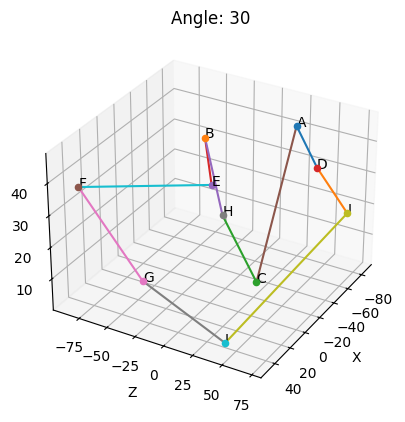

In [26]:
plot3D_path_from_edges(edges_path[0], points, 30)


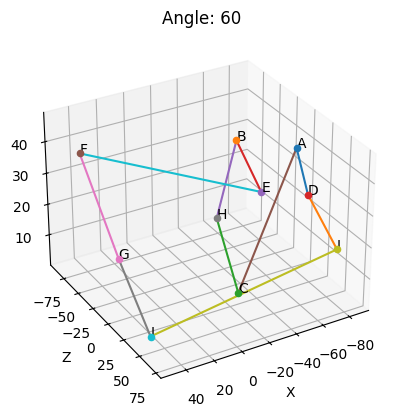

In [27]:
plot3D_path_from_edges(edges_path[0], points, 60)


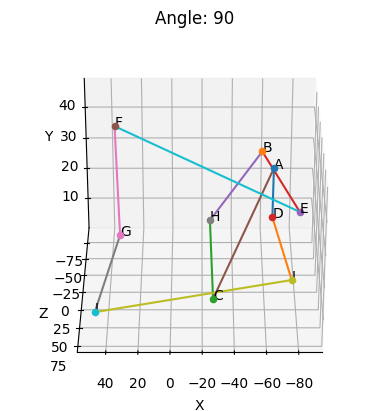

In [28]:
plot3D_path_from_edges(edges_path[0], points, 90)


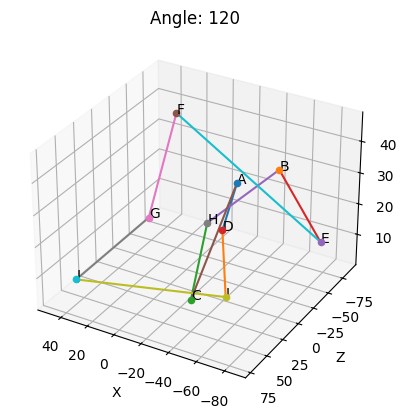

In [29]:
plot3D_path_from_edges(edges_path[0], points, 120)


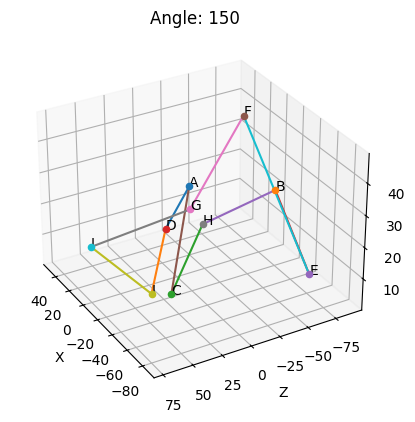

In [30]:
plot3D_path_from_edges(edges_path[0], points, 150)


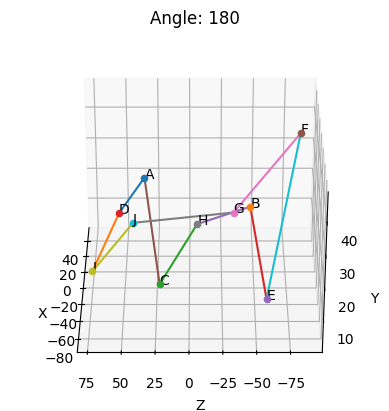

In [31]:
plot3D_path_from_edges(edges_path[0], points, 180)
